The goal of the project is to create an $M/M/c$ Queueing model via `simpy` that returns a simulated wait time for each customer and calculates the mean.  Since hourly traffic varies, simulations must be done for each hour.  Then, for each hour, we select the lowest value of $k$ that keeps the mean wait time below some pre-defined threshold.

For the desired store: we locate the "popular times" graph on Google Maps for the desired day:

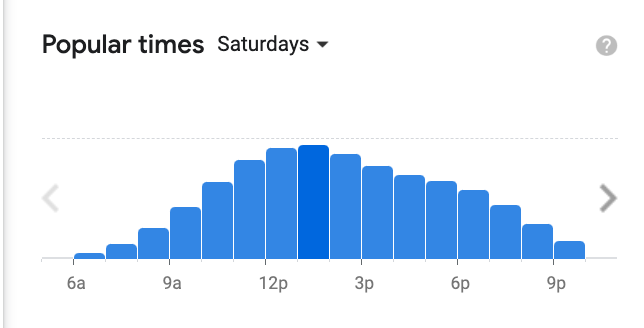

Then, we calculate the pixel height of the histogram at each each hour.  For each hour, we divide it's pixel height by the total pixel height across all business hours.  The result is a probability distribution, which allows us to distribute the daily forecast over each business hour.  The sales by hour are stored in a one dimensional array of length `store_close_time - store_open_time`


Using the sales by hour breakdown prescribed by our probability distribution above, we can estimate the average number of arrivals to the queue every hour.  Note, this method assumes that average invoice is constant throughout the hour, which may not always be valid.  Using an "average invoice total for a busy ---day" may be a better estimate under certain circumstances.

\begin{equation*}
\text{Average Ticket(\$)}=\frac{\text{Hourly Sales(\$)}}{\text{Number of Hourly Arrivals (\#)}}\Rightarrow
\text{Number of Hourly Arrivals(\#)}=\frac{\text{Hourly Sales(\$)}}{\text{Average Ticket(\$)}}
\end{equation*}

For each hour we assume that the number of arrivals follows a Poisson distribution with mean "$\text{Number of Hourly Arrivals}$".  For a Poisson arrival process, the time between arrivals then follows an exponential distribution with mean $\frac{1}{\text{Number of Hourly Arrivals}}$.

Using cashier reporting, we determine that the mean service time at the register and proceed with the simulation at each business hour.

In [3]:
import simpy
import random
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt

For the $M/M/C$ Queue, we want $L_{q}$.  We can find it via:
\begin{equation*}
\rho = \frac{\lambda}{c\mu}\text{ ; }
P_{0}=\frac{1}{\sum\limits_{m=0}^{c-1}\frac{(c\rho)^{m}}{m!} + \frac{(c\rho)^{c}}{c!(1-\rho)}}\text{ ; }
W_{q} = \frac{L_{q}}{\lambda}\text{ ; }
L_{q}=\frac{P_{0}{\big(\frac{\lambda}{\mu}\big)}^{c}\rho}{c!(1-\rho)^{2}}
\end{equation*}

Where $\lambda$ is the mean arrival rate , $\mu$ is the mean service rate, and $c$ is the number of independent identical servers.

In [30]:
def utilization(arrivals_per_hour,serv_cust_per_hour,servers):
    return(arrivals_per_hour/(servers*serv_cust_per_hour))

def mean_cust_in_queue:
 num = 


left off at simulation

### An Example, for a store that is open on a saturday, from 6 am until 10 pm, with an estimated $150,000 in sales and an average invoice/ticket of $80:

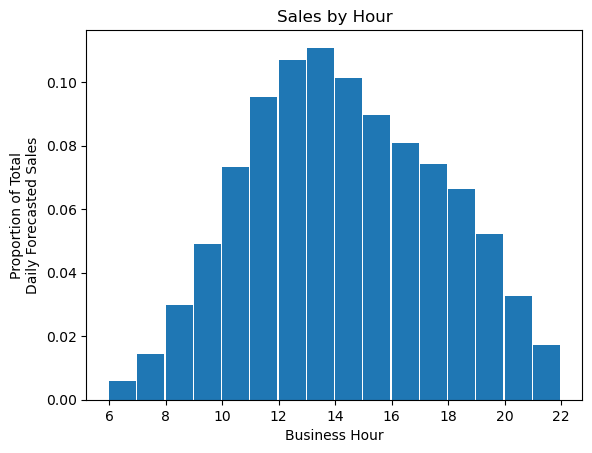

In [8]:
open_hour = 6
close_hour= 22

#later, we will take daily sales forecast and partition it hour by hour
#based on some probability distribution
sales_by_hour =      [867.05,   2167.63,  4479.77,  7369.94, 10982.66, 14306.36,
                    16040.46,  16618.5 , 15173.41, 13439.31, 12138.73, 11127.17,
                     9971.1 ,   7803.47,  4913.29,  2601.16]

hourly = GenerateHourbyHour(time_store_open=open_hour , time_store_close=close_hour,sales_by_hour=sales_by_hour,average_invoice=80)
HBH_histogram(hourly)

|    |   hour |    sales |   prop_total |   est_arrivals |
|---:|-------:|---------:|-------------:|---------------:|
|  0 |      6 |   867.05 |   0.00578033 |             11 |
|  1 |      7 |  2167.63 |   0.0144509  |             27 |
|  2 |      8 |  4479.77 |   0.0298651  |             56 |
|  3 |      9 |  7369.94 |   0.0491329  |             92 |
|  4 |     10 | 10982.7  |   0.0732177  |            137 |
|  5 |     11 | 14306.4  |   0.0953757  |            179 |
|  6 |     12 | 16040.5  |   0.106936   |            201 |
|  7 |     13 | 16618.5  |   0.11079    |            208 |
|  8 |     14 | 15173.4  |   0.101156   |            190 |
|  9 |     15 | 13439.3  |   0.0895954  |            168 |
| 10 |     16 | 12138.7  |   0.0809249  |            152 |
| 11 |     17 | 11127.2  |   0.0741811  |            139 |
| 12 |     18 |  9971.1  |   0.066474   |            125 |
| 13 |     19 |  7803.47 |   0.0520231  |             98 |
| 14 |     20 |  4913.29 |   0.0327553  |             61 |
| 15 |     21 |  2601.16 |   0.0173411  |             33 |